<a href="https://colab.research.google.com/github/milicaci/obuznie/blob/master/DZ_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [79]:
iris = load_iris()
#print(iris.DESCR)

In [80]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df_class = iris.target

In [81]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [82]:
df_n = df[['sepal length (cm)', 'sepal width (cm)']]
df_n.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


Данные на выборки для обучения и тестирования

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df_n, df_class, test_size=0.2)

Модель LDA

In [84]:
model = LinearDiscriminantAnalysis()

In [85]:
model.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [86]:
model.predict(X_test)

array([0, 1, 2, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2,
       1, 2, 1, 0, 2, 0, 1, 2])

In [87]:
accuracy_score(y_test, model.predict(X_test))

0.7666666666666667

Визуализация предсказания для тестовой выборки и центры классов

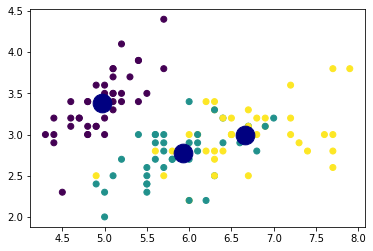

In [88]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.scatter(model.means_[:, 0], model.means_[:, 1], c='#000080', s=350, marker='o')

In [89]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

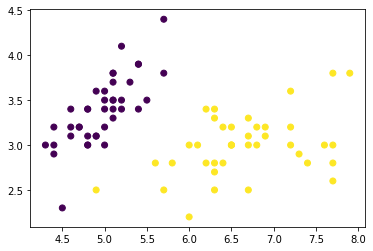

In [90]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

Подбераем оптимальное число кластеров для алгоритма kmeans и визуализируем полученную кластеризацию

In [91]:
scaler = StandardScaler()

In [92]:
X_scaled = scaler.fit_transform(df)

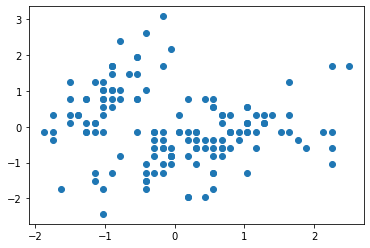

In [93]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])

In [97]:
kmeans = KMeans(n_clusters=3)

In [98]:
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

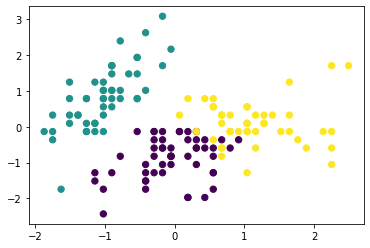

In [99]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, s=40)